## Reflection

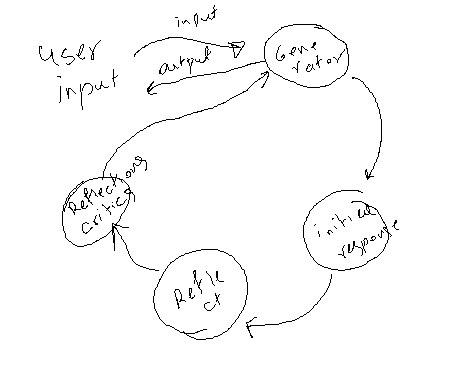

رفلکشن به معنای اینکه شما چند ال ال ام گران داشته باشید و بخواهید از طریق رفلکشن هزینه خود را کاهش دهید


مثلا مدل اولی ارزان تر و مدل بعدی گران تر یا از دو مدل ارزیان استفاده شود

In [1]:
!pip install -U --quiet  langgraph langchain tiktoken langchain_cohere langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.0/209.0 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00


In [64]:
from langchain_cohere import ChatCohere
from langchain.schema import SystemMessage, HumanMessage,AIMessage, StrOutputParser
from langchain.prompts import PromptTemplate, ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import (StrOutputParser)
from langgraph.graph import StateGraph, END, START
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.messages import HumanMessage
from langchain_core.prompts import MessagesPlaceholder
from typing import List, TypedDict

In [20]:
import os
import getpass

os.environ["COHERE_API_KEY"] = getpass.getpass()
# cohere_api_key="fN89ssKb6Le1pVnUwecj0cFCZBUy4WOE1roZ4rJL"

from langchain_cohere import CohereEmbeddings

embedding = CohereEmbeddings(model="embed-english-v3.0")
llm = ChatCohere(cohere_api_key=cohere_api_key)


··········


In [21]:
prompt = ChatPromptTemplate.from_messages([
    ("system", """Perform a sentiment analysis on the provided news. If the user provides feedback, respond only with a revised version of your initial attempt, nothing else."""),
    MessagesPlaceholder(variable_name="messages") ### دلیل تعریفش اینه اینجا که چون قراره فیدبک و جواب خودشون دوباره به مدل بدیم باید جایی باشه که این نتیجه به اضافه فیدبک بره اونجا بشینه
])


chain = prompt | llm | StrOutputParser()
user_messages = [{"role": "user", "content": "Here's the news about the stock: The stock has been rising steadily in the past few weeks."}]



In [22]:
def generation(llm):
  prompt = ChatPromptTemplate.from_messages(
    [("system","""Perform a sentiment analysis on the provided news. If the user provides feedback, respond only with a revised version of your initial attempt,nothing else"""),MessagesPlaceholder(variable_name="messages")])
  generate = prompt | llm | StrOutputParser()
  return generate

In [23]:
text = """به گزارش بورس نیوز، شرکت توسعه سامانه‌های نرم افزاری نگین از برگزاری مجمع عمومی عادی سالیانه خبر داد.

بر این اساس، این شرکت اعلام کرد، از کلیه سهامداران، وکیل یا قائم مقام قانونی صاحب سهم و همچنین نماینده یا نمایندگان اشخاص حقوقی دعوت می شود تا در جلسه مجمع عمومی این شرکت که در ساعت ۰۹:۳۰ روز یکشنبه مورخ ۱۴۰۳/۰۱/۱۹ در استان تهران، شهر تهران به آدرس خیابان ولیعصر - نرسیده به پل پارک وی - حد فاصل خیابان تورج و خیابان خاکزاد - مجموعه فرهنگی و ورزشی تلاش حضور بهم رسانند.

لازم به ذکر است"""
stock = "نگین"

In [24]:
gen_chain=generation(llm)
human_message_order = HumanMessage(content=f"""
solely Focuse on the sentiment reflected only by the terms related to the influence of the news on the rising or declining price of the {stock}
  while disregarding any other irrelevant information, such as historical events, social aspects, or unrelated congratulatory or condolences messages.  Please 'ONLY' output 'one' sentiment from [Positive / Neutral / Negative ] alongside with the reasoning. news:{text}, stock:{stock}""")
messages = [human_message_order]
gen_chain.invoke({'text':text, 'stock':stock, 'messages':messages})

'**Sentiment:** Neutral.\n\nThe news primarily announces the annual general meeting of the company, providing logistical details for shareholders and representatives. While it may indicate routine corporate proceedings, there is no explicit mention of any positive or negative impact on the stock price.'

In [25]:
text = """به گزارش بورس نیوز، ​محسن سیفی، مدیرعامل بانک صادرات ایران با صدور پیامی درگذشت دکتر رضا دولت‌آبادی، مدیرعامل بانک ملت و از چهره‌های ماندگار نظام بانکی را تسلیت گفت.
    ​
    در پیام محسن سیفی آمده است:
    ​
    «کل من علی‌ها فان و یبقی وجه ربک ذوالجلال و الاکرام»
    ​
    درگذشت مدیرعامل فقید بانک ملت و چهره ماندگار و تأثیرگذار شبکه بانکی کشور، جناب آقای رضا دولت‌آبادی، موجب اندوه و تأسف قلبی همه مدیران و کارکنان شبکه بانکی کشور شد.
    ​
    این چهره برجسته نظام بانکی کشور با صداقت، مسئولیت‌پذیری، اهتمام و همدلی، منشأ خیرات و برکات فراوان در اقتصاد کشور شد و نام نیک او در خاطر همه ما جاودانه خواهد ماند.
    ​
    اینجانب ضمن تسلیت به خانواده گرامی ایشان، کارکنان محترم شبکه بانکی و همکاران معظم بانک ملت، از درگاه خداوند متعال، برای روح آن مرحوم مغفرت الهی و برای اعضای خانواده، بازماندگان، دوستان و همکاران ایشان صبر و شکیبایی مسئلت دارم.
    ​
    محسن سیفی_ ​مدیرعامل بانک صادرات ایران"""
stock = "بانک ملت"

In [26]:
gen_chain = generation(llm)
human_message_order = HumanMessage(content=f"""
solely Focuse on the sentiment reflected only by the terms related to the influence of the news on the rising or declining price of the {stock}
choose sentiment from [Positive / Neutral / Negative ] alongside with the reasoning. news:{text}, stock:{stock}""")
messages = [human_message_order]
gen_chain.invoke({'text':text, 'stock':stock, 'messages':messages})

"Sentiment: Neutral.\n\nReasoning: The news article reports on the passing of the CEO of Bank Mellat, Dr. Reza Dowlatabadi, and expresses condolences from the CEO of Bank Saderat Iran, Mohsen Seyfi. While the message acknowledges the late CEO's significant contributions to the banking system and his positive qualities, it does not directly mention any impact on the stock price of Bank Mellat. The sentiment remains neutral regarding the stock price as it focuses on offering condolences and remembering the deceased's legacy."

In [27]:
gen_chain = generation(llm)
human_message_order = HumanMessage(content=f"""
solely Focuse on the sentiment reflected only by the terms related to the influence of the news on the rising or declining price of the {stock}
choose sentiment from [Positive / Neutral / Negative ] with only say the sentiment with one word. news:{text}, stock:{stock}""")
messages = [human_message_order]
gen_chain.invoke({'text':text, 'stock':stock, 'messages':messages})

'Neutral'

In [28]:
text = """به گزارش بورس نیوز،  در متن پیام وی آمده است:
    ​
    پیروزی انقلاب اسلامی مرهون خون شهیدانی است که دلاورانه در مقابل ستم پیشگان ایستادند و با نثار خونشان درخت انقلاب را آبیاری کردند و امروز ایران اسلامی به برکت خون آن‌ها و رادمردی‌های مردان و زنان در تلاش و مؤمن، طی بیش از چهار دهه، شاهد شکوفایی در تمامی عرصه‌های مختلف اقتصادی، اجتماعی، فرهنگی و هنری بر پایه آموزه‌های اسلامی است و مسیر موفقیت کشور با رهبری مقام معظم رهبری همچنان افق‌های تازه‌ای را در سطح جهانی طی می‌کند.
    ​
    ۱۲ بهمن یادآور خاطره بازگشت بنیانگذار و معمار فرزانه انقلاب اسلامی امام خمینی (ره) به ایران، همه ساله آغاز دهه مبارک فجر و روز‌های به ثمر رسیدن انقلاب اسلامی است.
    ​
    من فرارسیدن این روز و یوم‌الله دهه مبارک فجر را به عموم مردم ایران، کارکنان نظام بانکی به ویژه همکاران بانک صادرات ایران تبریک عرض می‌کنم. بانک صادرات ایران در مسیر پایمردی برای حفظ ارزش‌های انقلاب و کمک به تحقق اهداف اقتصادی در کنار مردم و مسئولان دلسوز کشور ایستاده و همچون همیشه از تمامی ظرفیت‌های خود استفاده خواهد کرد."""
stock = "صادرات ایران"

In [37]:
from typing import Optional

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from pydantic import BaseModel
class SentimentAnalyser(BaseModel):
    '''Identifying information about news sentiment.'''

    sentiment: str = Field(..., description="the sentiment of news, only can be one of [neutral, positive, negative]")

In [40]:
gen_chain = generation(llm)

human_message_order = HumanMessage(content=f"""
solely Focuse on the sentiment reflected only by the terms related to the influence of the news on the rising or declining price of the {stock}
choose sentiment from [Positive / Neutral / Negative ] alongside with the reasoning. news:{text}, stock:{stock}""")
messages = [human_message_order]
generate=prompt | llm.with_structured_output(SentimentAnalyser)

SENTIMENT_ANALYSIS= generate.invoke({'messages':messages})
SENTIMENT_ANALYSIS



/usr/local/lib/python3.10/dist-packages/pydantic/json_schema.py:2285: PydanticJsonSchemaWarning: Default value default=Ellipsis description='the sentiment of news, only can be one of [neutral, positive, negative]' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)


SentimentAnalyser(sentiment='Positive')

In [31]:
class Judge(BaseModel):
    '''Assessment of agreement between the advisor's and the analyst's views on the stock as reflected in the analyzed news.'''
    agreement: str = Field(..., description="Specifies if the advisor agrees with the provided sentiment or not. Possible values are [yes, no].")
    reasoning: str = Field(..., description="return the reasoning behind the agreement or disagreement")

In [32]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [("system","""Your task is to review the sentiment analysis results for the news article about {stock}.
1. Assess whether the sentiment (Positive, Neutral, or Negative) accurately reflects the impact of the news on the stock's price movement.
2. Ensure the sentiment analysis considers only factors relevant to the stock's price movement, disregarding any irrelevant details like historical events or social aspects.3. Clearly mention that you agree or disagree with the sentiment analysis results for {stock} and your opinion.
Please note:
- Sentiment must be one of the following: Positive, Neutral, or Negative. it can not be undetermined.
- Specify your agreement or disagreement solely with the sentiment, not its reasoning.- Ensure the sentiment analysis is based solely on the price movement of {stock}.
News: {text}
Stock: {stock},
sentiment: {sentiment}"""),MessagesPlaceholder(variable_name="messages"),])

In [33]:
reflect = reflection_prompt | llm.with_structured_output(Judge)
reflection = reflect.invoke({"messages": messages, 'text':text, 'stock':stock, 'sentiment':f"sentiment twords the {stock} is {SENTIMENT_ANALYSIS.sentiment}"})
reflection

/usr/local/lib/python3.10/dist-packages/pydantic/json_schema.py:2285: PydanticJsonSchemaWarning: Default value default=Ellipsis description='Specifies if the advisor agrees with the provided sentiment or not. Possible values are [yes, no].' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
/usr/local/lib/python3.10/dist-packages/pydantic/json_schema.py:2285: PydanticJsonSchemaWarning: Default value default=Ellipsis description='return the reasoning behind the agreement or disagreement' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)



### **Multi Agents with Langraph**



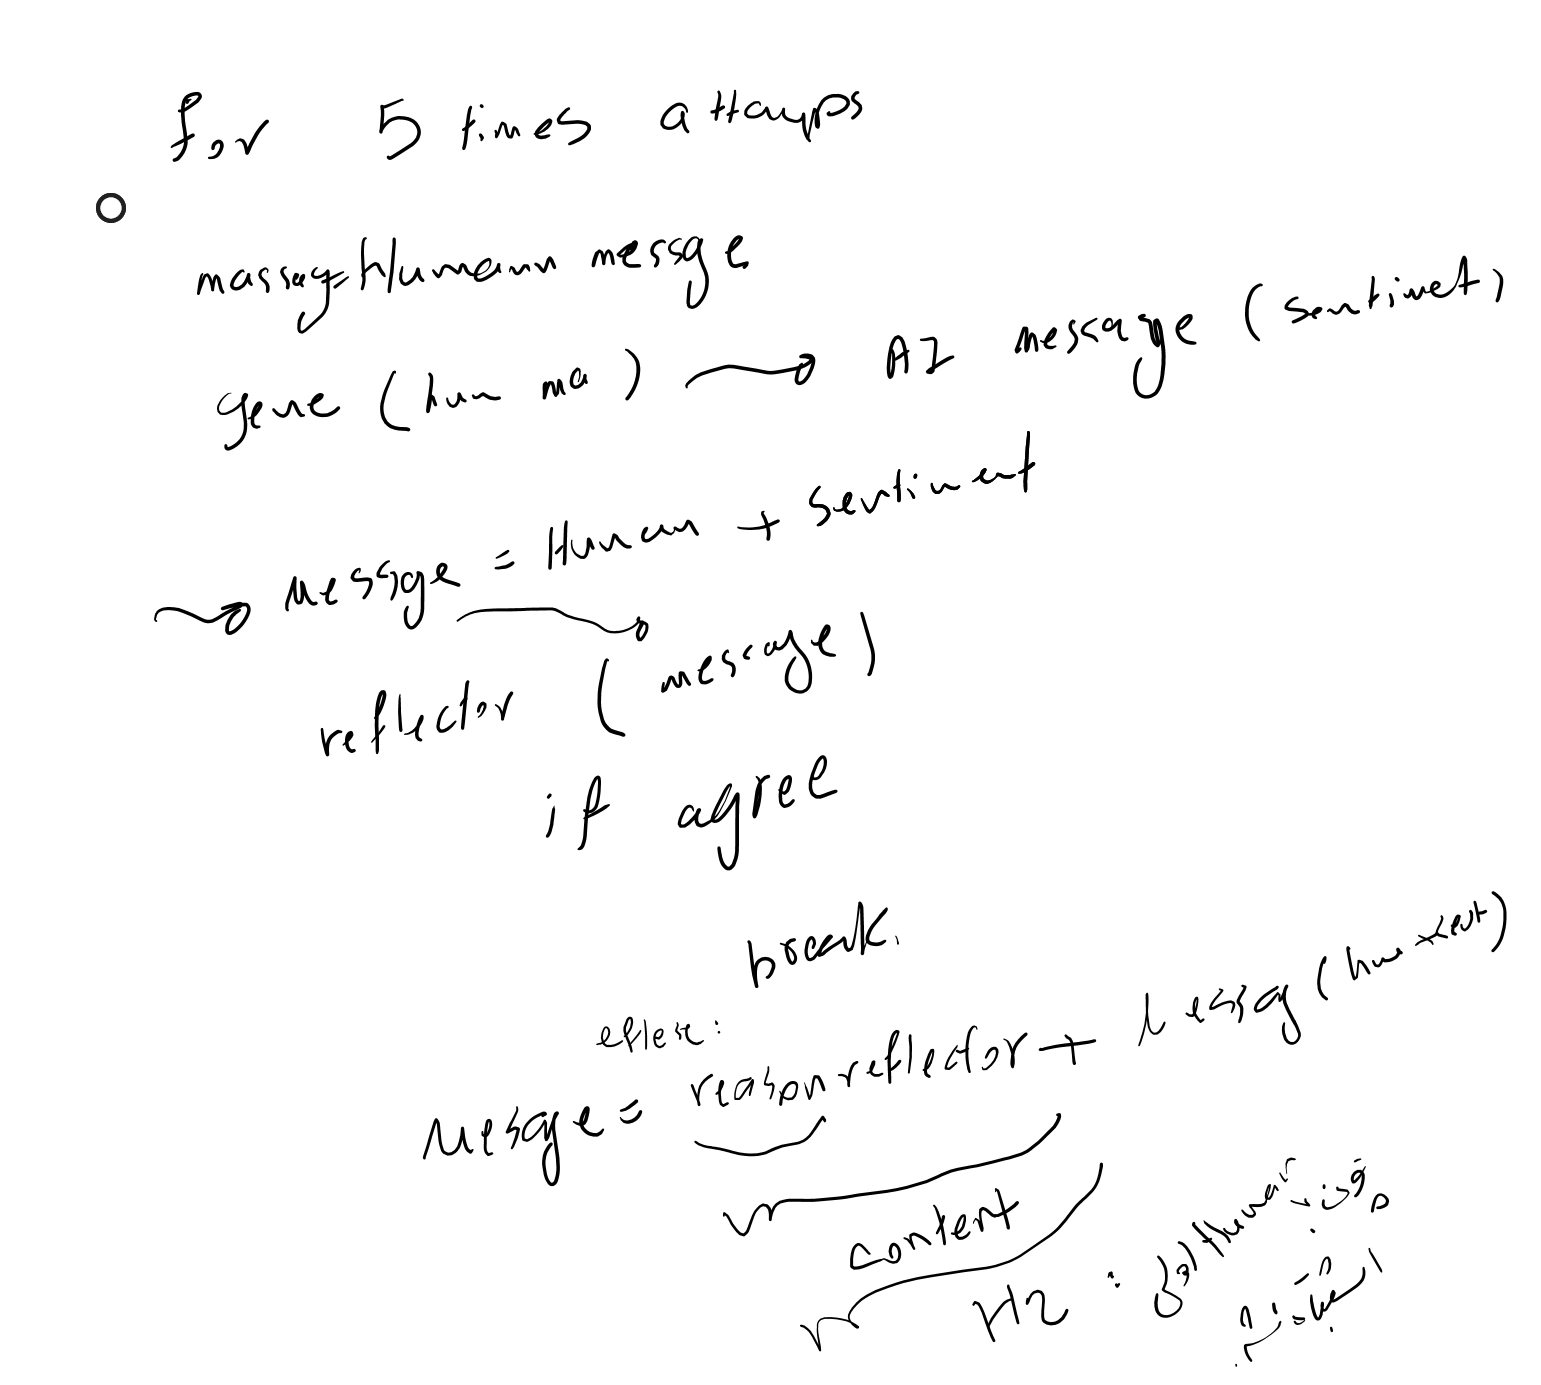

حالا باید کاری کنیم که داخل این لوپ نیفتیم و اینجاست که از مولتی ایجنتها و لنگراف استفاده میشه

از انالیزر به رفلکتور میشه یال EDG
حالا اگر رفلکتور تایید کرد میره 3 و این یال نو سه کاندیشنال ادج هست

از 2 به 1 و از 3 به 2 کاندیشنال ادج هست
ولی از یک به 2 که حتما ران میشه ادج هست

این سایت رای کپی پیست کردن کد
https://dpaste.org/

State
چیزیه که بین نودها جا به جا میشه

In [ ]:
class SentimentAnalyser(BaseModel): ## برای جنریتوره
    '''Identifying information about news sentiment.'''
    sentiment: str = Field(..., description="The sentiment of news, only can be one of [neutral, positive, negative]")

class Judge(BaseModel):  ### برای رفلکتوره
    '''Assessment of agreement between the advisor's and the analyst's views on the stock as reflected in the analyzed news.'''
    agreement: str = Field(..., description="Specifies if the advisor agrees with the provided sentiment or not. Possible values are [yes, no].") ### اره یا نه باعث میشه داخل لوپ الکی نیفتیم
    reasoning: str = Field(..., description="Return the reasoning behind the agreement or disagreement") ### IF تعریف شه که اگر مخالف بود به همراه ریزنینگ به اولیه داده بشه

# Define models
llm = ChatOpenAI(model="gpt-4o-mini")
# Define prompts
sentiment_prompt = ChatPromptTemplate.from_messages([
    ("system", """
    Perform a sentiment analysis on the provided news about {stock}. Focus solely on the sentiment reflected by the terms related to the influence of the news on the rising or declining price of the stock, while disregarding any other irrelevant information, such as historical events, social aspects, or unrelated congratulatory or condolences messages.
    Perform a sentiment analysis on the provided news. Focus solely on the sentiment reflected only
    by the terms related to the influence of the news on the rising or declining price of the {stock},
     while disregarding any other irrelevant information such as historical events, social aspects,
      or unrelated congratulatory or condolences messages.
            News: {text}
            stock: {stock}
            Please 'ONLY' output 'one' sentiment from [Positive / Neutral / Negative ] alongside the reasoning.
    """),
    MessagesPlaceholder(variable_name="messages")
])

reflection_prompt = ChatPromptTemplate.from_messages([
    ("system", """
    Your task is to review the sentiment analysis results for the news article about {stock}.
    1. Assess whether the sentiment (Positive, Neutral, or Negative) accurately reflects the impact of the news on the stock's price movement.
    2. Ensure the sentiment analysis considers only factors relevant to the stock's price movement, disregarding any irrelevant details like historical events or social aspects.
    3. Clearly mention that you agree or disagree with the sentiment analysis results for {stock} and your opinion.
    Please note:
    - Sentiment must be one of the following: Positive, Neutral, or Negative. It cannot be undetermined.
    - Specify your agreement or disagreement solely with the sentiment, not its reasoning.
    - Ensure the sentiment analysis is based solely on the price movement of {stock}.
    News: {text}
    Stock: {stock}
    Sentiment: {sentiment}
    """),
    MessagesPlaceholder(variable_name="messages")
])


In [55]:
generate_node = sentiment_prompt | llm.with_structured_output(SentimentAnalyser)
reflect_node = reflection_prompt | llm.with_structured_output(Judge)

# Graph definition
class GraphState(TypedDict):
    iteration: int
    sentiment: str
    agreement: str
    messages: List
    stock_name: str
    news_text: str

graph = StateGraph(GraphState)

def generate_sentiment(state):
    state['iteration'] += 1
    state['sentiment'] = generate_node.invoke({"messages": state["messages"], "stock": state['stock_name'], "text": state['news_text']}).sentiment
    return state

def reflect_sentiment(state):
    reflection_input = {
        "messages": state["messages"],
        "stock": state['stock_name'],
        "text": state['news_text'],
        "sentiment": state['sentiment']
    }
    response = reflect_node.invoke(reflection_input)
    state['agreement'] = response.agreement
    state['messages'].append(HumanMessage(content=f"The sentiment analysis for {state['stock_name']} resulted in an agreement status of '{response.agreement}'. Here is the reasoning provided: {response.reasoning}"))
    state['agreement'] = response.agreement
    return state

def should_continue(state):
    if state['agreement'] == 'yes' or state['iteration'] >= state.get("max_iterations", 5):
        return END
    return "generate_sentiment"

# Add nodes

graph.add_node("generate_sentiment", generate_sentiment)
graph.add_node("reflect_sentiment", reflect_sentiment)

# Define flow
graph.add_edge(START, "generate_sentiment")

graph.add_edge("generate_sentiment", "reflect_sentiment")
graph.add_conditional_edges("reflect_sentiment", should_continue, {
    END: END,
    "generate_sentiment": "generate_sentiment"
})

# Compile graph
app = graph.compile()

# Invocation
initial_state = {
    "messages":[],
    "iteration": 0,
    "max_iterations": 7,
    "stock_name": stock,
    "news_text": text
}
final_state = app.invoke(initial_state)


In [ ]:
final_state